# Project

## Phase 1

In [1]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install langdetect

     -------------------------------------- 288.2/288.2 kB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 7.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.1
    Uninstalling matplotlib-3.6.1:
      Successfully uninstalled matplotlib-3.6.1
  Using cached langdetect-1.0.9-py3-none-any.whl


In [2]:
import pandas as pd
import numpy as np

import seaborn

## Preprocess Data

The Genius Lyrics dataset from "https://github.com/danielhorizon/lyrics-genreation" has already been preprocessed, so we just need to apply the same clean up to the "https://www.kaggle.com/datasets/mateibejan/multilingual-lyrics-for-genre-classification" dataset. This involves removing missing/small (less than 10 words) lyrics, non-english lyrics, missing genres, lowercasing all the words, and removing stop characters.

Below is a count plot of the distribution of different genres represented in the Genius Lyrics dataset.

Num of rows:  53837


,Unnamed: 0,artist,genre,title,lyrics,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,language,t-lyric
0,0,Iron Maiden,metal,The Number of the Beast,woe to you o'er earth and sea\r\nfor the devil...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['the', 'number', 'of', 'the', 'beast', '@@@',..."
1,1,Iron Maiden,metal,Fear of the Dark,i am a man who walks alone\r\nand when i'm wal...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['fear', 'of', 'the', 'dark', '@@@', 'i', 'am'..."
2,2,Iron Maiden,metal,The Trooper,you'll take my life but i'll take yours too\r\...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['the', 'trooper', '@@@', ""you'll"", 'take', 'm..."
3,3,Iron Maiden,metal,Hallowed Be Thy Name,i'm waiting in my cold cell when the bell begi...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['hallowed', 'be', 'thy', 'name', '@@@', ""i'm""..."
4,4,Iron Maiden,metal,Run to the Hills,white man came across the sea\r\nhe brought us...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['run', 'to', 'the', 'hills', '@@@', 'white', ..."


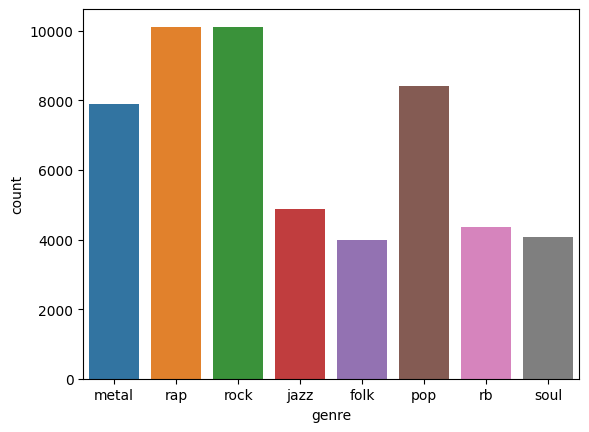

In [3]:
data = pd.read_csv("./data/master-process-data.csv", low_memory=False)
print("Num of rows: ", len(data))
seaborn.countplot(data, x='genre')
data.head()

### Cleaning the Multi-Lingual Lyrics for Genre Classification Dataset

Combine the training and testing data:

In [4]:
data2_train = pd.read_csv("./data/train.csv")
data2_test = pd.read_csv("./data/test.csv")

data2 = pd.concat([data2_train, data2_test])

data2.head()

,Artist,Song,Genre,Language,Lyrics,Song year,Track_id
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ...",NaN,NaN
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...,NaN,NaN
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v...",NaN,NaN
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...,NaN,NaN
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...,NaN,NaN


Num of rows:  298118


<AxesSubplot: xlabel='Genre', ylabel='count'>

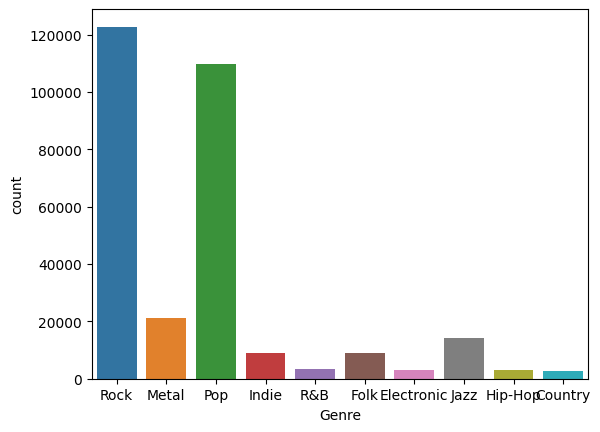

In [5]:
print("Num of rows: ", len(data2))
seaborn.countplot(data2, x='Genre')

In [6]:
def clean_data(data):
    subset = data[['Genre','Lyrics']]
    data.dropna(subset=['Genre', 'Lyrics'], inplace=True)

    # replace new lines with spaces
    data['Lyrics'] = data['Lyrics'].str.replace('\n', ' ')

    # remove entries with < 2 words

    data['word_num'] = data['Lyrics'].str.split().str.len()
    
    #remove entries where only 1 word in song
    data['word_num'].astype('int32')
    data = data[data.word_num > 1]

    # rename song with empty name to Nan
    data['Song'].replace(to_replace=np.nan, value='Nan', inplace=True)

    # remove non-englsh
    return data

data2 = clean_data(data2)

data2.head()

C:\Users\ajiev\AppData\Local\Temp\ipykernel_6360\3092725829.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Song'].replace(to_replace=np.nan, value='Nan', inplace=True)


,Artist,Song,Genre,Language,Lyrics,Song year,Track_id,word_num
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate Fueled b...",NaN,NaN,332
1,12 stones,broken,Rock,en,Freedom! Alone again again alone Patiently wai...,NaN,NaN,248
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v...",NaN,NaN,142
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am But you can't i...,NaN,NaN,156
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...,NaN,NaN,337


In [7]:
from langdetect import detect

def language_detector(string):
    try:
        res = detect(string)
    except:
        res = "undetectable"
    return res

data2.loc[data2['Language'] != 'en', 'Language'] = data2['Lyrics'][data2['Language'] != 'en'].apply(language_detector)

In [8]:
data2 = data2[data2['Language'] == 'en']
data2.head()

,Artist,Song,Genre,Language,Lyrics,Song year,Track_id,word_num
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate Fueled b...",NaN,NaN,332
1,12 stones,broken,Rock,en,Freedom! Alone again again alone Patiently wai...,NaN,NaN,248
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v...",NaN,NaN,142
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am But you can't i...,NaN,NaN,156
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...,NaN,NaN,337


In [9]:
# code from https://github.com/danielhorizon/lyrics-genreation

stopChars = [',','(',')','.','-','[',']','"']
# preprocessing the corpus by converting all letters to lowercase, 
# replacing blank lines with blank string and removing special characters
def preprocessText(text):
#     text = text.replace('\n', ' ').replace('\t','')
    processedText = text.lower()
    for char in stopChars:
        processedText = processedText.replace(char,'')
    return processedText


In [10]:
# Preprocess 
data2['Lyrics'] = data2['Lyrics'].apply(preprocessText)

In [11]:
data2.to_csv('./data/multilingual-processed.csv')

### Merge the Datasets

In [12]:
data2['cleanTitle'] = data2['Song'].apply(preprocessText)
data['cleanTitle'] = data['title'].apply(preprocessText)

# see how many titles are being shared
len(set(data['cleanTitle']).intersection(set(data2['cleanTitle'])))

18476

In [13]:
data.head()

,Unnamed: 0,artist,genre,title,lyrics,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,language,t-lyric,cleanTitle
0,0,Iron Maiden,metal,The Number of the Beast,woe to you o'er earth and sea\r\nfor the devil...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['the', 'number', 'of', 'the', 'beast', '@@@',...",the number of the beast
1,1,Iron Maiden,metal,Fear of the Dark,i am a man who walks alone\r\nand when i'm wal...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['fear', 'of', 'the', 'dark', '@@@', 'i', 'am'...",fear of the dark
2,2,Iron Maiden,metal,The Trooper,you'll take my life but i'll take yours too\r\...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['the', 'trooper', '@@@', ""you'll"", 'take', 'm...",the trooper
3,3,Iron Maiden,metal,Hallowed Be Thy Name,i'm waiting in my cold cell when the bell begi...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['hallowed', 'be', 'thy', 'name', '@@@', ""i'm""...",hallowed be thy name
4,4,Iron Maiden,metal,Run to the Hills,white man came across the sea\r\nhe brought us...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['run', 'to', 'the', 'hills', '@@@', 'white', ...",run to the hills


In [14]:
data2.head()

,Artist,Song,Genre,Language,Lyrics,Song year,Track_id,word_num,cleanTitle
0,12 stones,world so cold,Rock,en,it starts with pain followed by hate fueled by...,NaN,NaN,332,world so cold
1,12 stones,broken,Rock,en,freedom! alone again again alone patiently wai...,NaN,NaN,248,broken
2,12 stones,3 leaf loser,Rock,en,biting the hand that feeds you lying to the vo...,NaN,NaN,142,3 leaf loser
3,12 stones,anthem for the underdog,Rock,en,you say you know just who i am but you can't i...,NaN,NaN,156,anthem for the underdog
4,12 stones,adrenaline,Rock,en,my heart is beating faster can't control these...,NaN,NaN,337,adrenaline


<AxesSubplot: xlabel='genre', ylabel='count'>

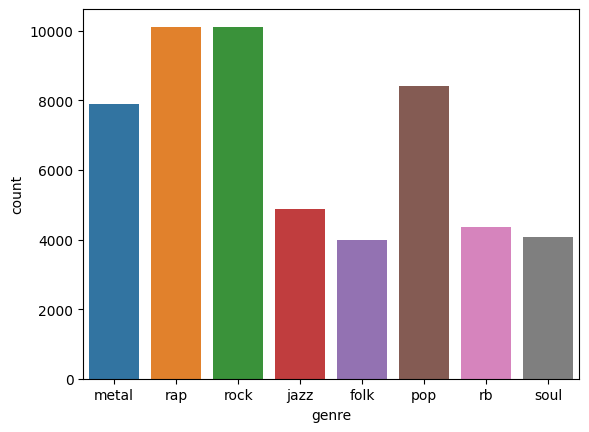

In [15]:
seaborn.countplot(data, x='genre')

<AxesSubplot: xlabel='Genre', ylabel='count'>

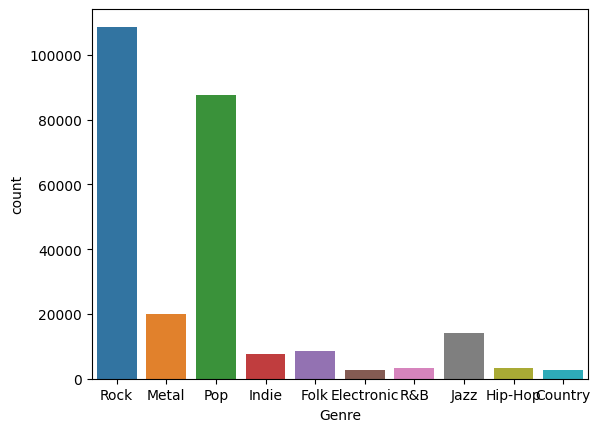

In [16]:
# pick the genres
seaborn.countplot(data2, x='Genre')


In [17]:
# unify the genres
data2['Genre'] = data2['Genre'].apply(lambda string: string.lower())
data['genre'].replace(to_replace='rb', value='r&b', inplace=True)
data['genre'].replace(to_replace='rap', value='hip-hop', inplace=True)

genres = ['rock', 'metal', 'pop', 'folk', 'r&b', 'jazz', 'hip-hop']
unified_data = data[data['genre'].isin(genres)]
unified_data2 = data2[data2['Genre'].isin(genres)]

In [18]:
# unify columns
unified_data2 = unified_data2.rename(columns={'Genre': 'genre', 'Lyrics': 'lyrics'})
unified_data2.head()

,Artist,Song,genre,Language,lyrics,Song year,Track_id,word_num,cleanTitle
0,12 stones,world so cold,rock,en,it starts with pain followed by hate fueled by...,NaN,NaN,332,world so cold
1,12 stones,broken,rock,en,freedom! alone again again alone patiently wai...,NaN,NaN,248,broken
2,12 stones,3 leaf loser,rock,en,biting the hand that feeds you lying to the vo...,NaN,NaN,142,3 leaf loser
3,12 stones,anthem for the underdog,rock,en,you say you know just who i am but you can't i...,NaN,NaN,156,anthem for the underdog
4,12 stones,adrenaline,rock,en,my heart is beating faster can't control these...,NaN,NaN,337,adrenaline


In [19]:
merged_data = pd.concat([unified_data, unified_data2])
merged_data

,Unnamed: 0,artist,genre,title,lyrics,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 22,language,t-lyric,cleanTitle,Artist,Song,Language,Song year,Track_id,word_num
0,0.0,Iron Maiden,metal,The Number of the Beast,woe to you o'er earth and sea\r\nfor the devil...,NaN,NaN,NaN,NaN,NaN,...,NaN,en,"['the', 'number', 'of', 'the', 'beast', '@@@',...",the number of the beast,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Iron Maiden,metal,Fear of the Dark,i am a man who walks alone\r\nand when i'm wal...,NaN,NaN,NaN,NaN,NaN,...,NaN,en,"['fear', 'of', 'the', 'dark', '@@@', 'i', 'am'...",fear of the dark,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Iron Maiden,metal,The Trooper,you'll take my life but i'll take yours too\r\...,NaN,NaN,NaN,NaN,NaN,...,NaN,en,"['the', 'trooper', '@@@', ""you'll"", 'take', 'm...",the trooper,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Iron Maiden,metal,Hallowed Be Thy Name,i'm waiting in my cold cell when the bell begi...,NaN,NaN,NaN,NaN,NaN,...,NaN,en,"['hallowed', 'be', 'thy', 'name', '@@@', ""i'm""...",hallowed be thy name,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Iron Maiden,metal,Run to the Hills,white man came across the sea\r\nhe brought us...,NaN,NaN,NaN,NaN,NaN,...,NaN,en,"['run', 'to', 'the', 'hills', '@@@', 'white', ...",run to the hills,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7930,NaN,NaN,rock,NaN,tuesday night 7:30 i hear a voice on the tele...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,toolittletoolate,amanda-marshall,too-little-too-late,en,2006.0,23453.0,250.0
7931,NaN,NaN,metal,NaN,elite forces cloaked in fur un sensitive to pa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,berserker,aurora-borealis,berserker,en,2007.0,2724.0,211.0
7932,NaN,NaN,hip-hop,NaN,dr dre journey with me into the mind of a mani...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,naturalbornkillaz,dr-dre,natural-born-killaz,en,2010.0,24147.0,588.0
7933,NaN,NaN,rock,NaN,you can a look a hurricane right in the eye 12...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,wideawake,chris-cornell,wide-awake,en,2011.0,4150.0,146.0


Num of rows 295268


<AxesSubplot: xlabel='genre', ylabel='count'>

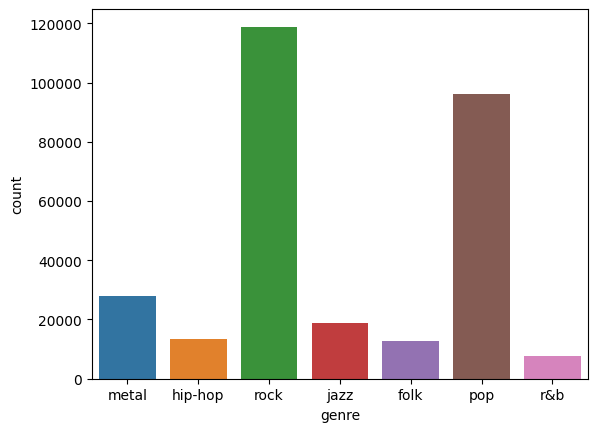

In [20]:
print('Num of rows', len(merged_data))
seaborn.countplot(merged_data, x='genre')

In [21]:
merged_data.to_csv('./data/merged_data.csv')

In [22]:
filtered = merged_data[['cleanTitle', 'genre', 'lyrics']].rename(columns={'cleanTitle': 'title'})
print(len(filtered))
filtered.to_csv('./data/data.csv')

295268
